# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress


# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 614


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

##### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
base_url = "http://api.openweathermap.org/data/2.5/weather?"
query_section = "appid=" + weather_api_key

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0
  
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(base_url + query_section + "&q=" + city).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | adamstown
Processing Record 2 of Set 1 | taiohae
City not found. Skipping...
Processing Record 3 of Set 1 | isafjordur
Processing Record 4 of Set 1 | tranovaho
City not found. Skipping...
Processing Record 5 of Set 1 | puerto ayora
Processing Record 6 of Set 1 | remire-montjoly
Processing Record 7 of Set 1 | longyearbyen
Processing Record 8 of Set 1 | lerwick
Processing Record 9 of Set 1 | pechora
Processing Record 10 of Set 1 | papatowai
Processing Record 11 of Set 1 | punta arenas
Processing Record 12 of Set 1 | callao
Processing Record 13 of Set 1 | albany
Processing Record 14 of Set 1 | crane
Processing Record 15 of Set 1 | vorgashor
Processing Record 16 of Set 1 | puerto natales
Processing Record 17 of Set 1 | waitangi
Processing Record 18 of Set 1 | ushuaia
Processing Record 19 of Set 1 | edinburgh of the seven seas
Processing Record 20 of Set 1 | bethel
Processing Record 21 of Set 1 | ciud

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          581
Lat           581
Lng           581
Max Temp      581
Humidity      581
Cloudiness    581
Wind Speed    581
Country       581
Date          581
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,adamstown,-25.0660,-130.1015,298.35,78,5,4.61,PN,1682458290
1,isafjordur,66.0755,-23.1240,272.08,58,7,2.83,IS,1682458184
2,puerto ayora,-0.7393,-90.3518,302.13,88,31,2.68,EC,1682458291
3,remire-montjoly,4.9167,-52.2667,299.17,89,75,1.54,GF,1682458202
4,longyearbyen,78.2186,15.6401,266.06,79,0,1.54,SJ,1682458292


In [7]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

#### milestone - read csv data

In [3]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,adamstown,-25.0660,-130.1015,298.35,78,5,4.61,PN,1682458290
1,isafjordur,66.0755,-23.1240,272.08,58,7,2.83,IS,1682458184
2,puerto ayora,-0.7393,-90.3518,302.13,88,31,2.68,EC,1682458291
3,remire-montjoly,4.9167,-52.2667,299.17,89,75,1.54,GF,1682458202
4,longyearbyen,78.2186,15.6401,266.06,79,0,1.54,SJ,1682458292


## Create the Scatter Plots Requested

#### Latitude Vs. Temperature

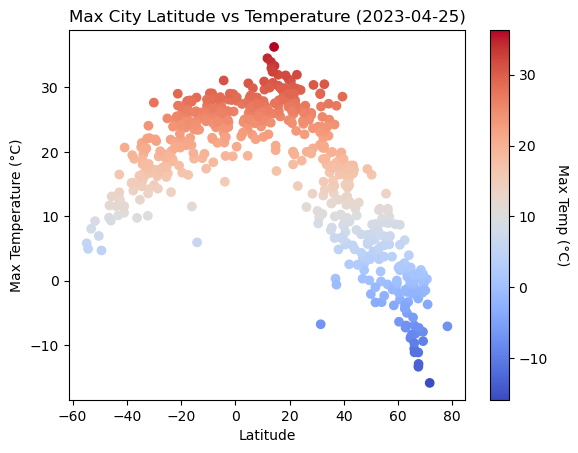

In [4]:
# create a color map for the temperature values

# converting kelvin to celcius 
city_data_df['Max Temp'] = city_data_df['Max Temp'] - 273.15

colormap = plt.colormaps['coolwarm']
normalize = plt.Normalize(city_data_df['Max Temp'].min(), city_data_df['Max Temp'].max())

# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df['Lat'], city_data_df['Max Temp'], c=city_data_df['Max Temp'], cmap=colormap, norm=normalize)


# Incorporate the other graph properties
cbar = plt.colorbar()
cbar.ax.set_ylabel('Max Temp (°C)', rotation=270, labelpad=15)

start_date = pd.Timestamp(city_data_df['Date'].min(), unit='s').strftime('%Y-%m-%d')
end_date = pd.Timestamp(city_data_df['Date'].max(), unit='s').strftime('%Y-%m-%d')
if start_date == end_date:
    plt.title(f'Max City Latitude vs Temperature ({start_date})')
else:
    plt.title(f'Max City Latitude vs Temperature ({start_date} to {end_date})')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (°C)')


# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

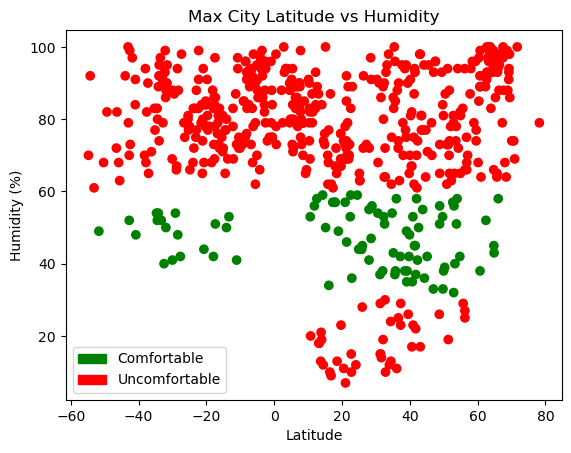

<Figure size 640x480 with 0 Axes>

In [6]:
# Build the scatter plots for latitude vs. humidity

# classify humidity into comfortable and uncomfortable categories
humid_bins = [0, 30, 60, 100]
humid_labels = ['Uncomfortable', 'Comfortable', 'Uncomfortable']
city_data_df['Humidity Category'] = pd.cut(city_data_df['Humidity'],\
                                            bins=humid_bins,\
                                            labels=humid_labels,\
                                            include_lowest=True,\
                                            ordered=False)

# create a color map for the humidity categories
humid_colors = {'Comfortable': 'green', 'Uncomfortable': 'red'}
city_data_df['Humidity Color'] = city_data_df['Humidity Category'].map(humid_colors)

# Incorporate the other graph properties

plt.scatter(city_data_df['Lat'], city_data_df['Humidity'], c=city_data_df['Humidity Color'])

# add a legend and set the axis labels
plt.legend(handles=[plt.Circle((0, 0), 1, color='green'), plt.Circle((0, 0), 1, color='red')], labels=['Comfortable', 'Uncomfortable'])
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('Max City Latitude vs Humidity')

plt.show()

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


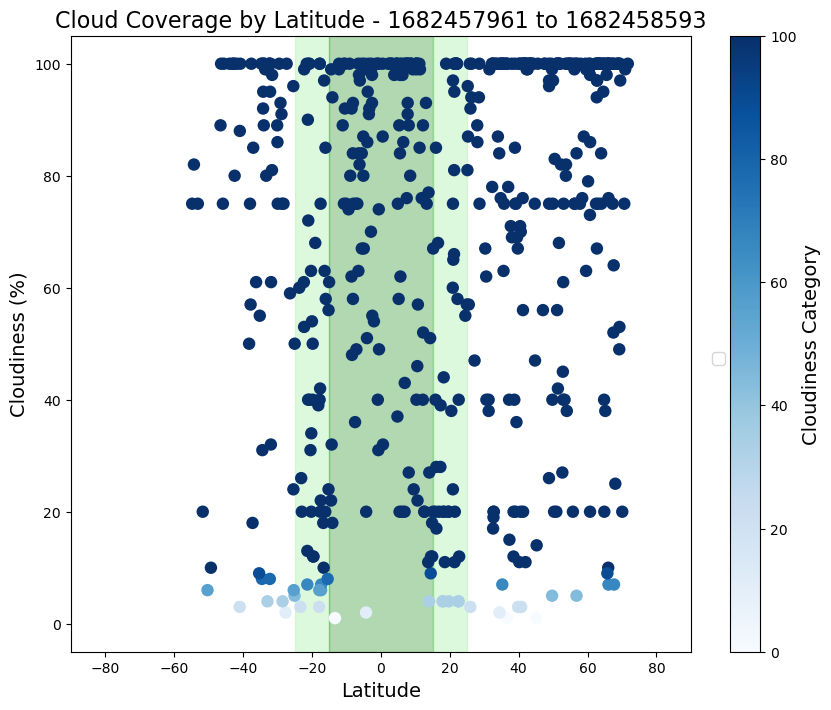

In [19]:
# Define cloud coverage bins
bins = [0, 10, 20, 30, 60, 70, 90, 100]
labels = ["Sunny/Clear", "Fair", "Mostly sunny", "Partly cloudy", "Partly sunny", "Mostly cloudy", "Overcast"]
city_data_df['Cloudiness Category'] = pd.cut(city_data_df['Cloudiness'], bins=bins, labels=labels)

# Define the tropical moist climates bands
south_edge = (-25, -15)
equator_band = (-15, 15)
north_edge = (15, 25)

# Define figure and axis objects
fig, ax = plt.subplots(figsize=(10, 8), sharey=True)

# Add tropical moist climates bands
plt.axvspan(south_edge[0], south_edge[1], color='lightgreen', alpha=0.3)
plt.axvspan(equator_band[0], equator_band[1], color='green', alpha=0.3)
plt.axvspan(north_edge[0], north_edge[1], color='lightgreen', alpha=0.3)

# Define the colors for the gradient
color_map = plt.cm.ScalarMappable(cmap=plt.cm.Blues)
color_map.set_array(city_data_df['Cloudiness'])

# Plot scatter plot with color-coded cloudiness categories
for label in labels:
    subset = city_data_df[city_data_df['Cloudiness Category'] == label]
    color = plt.cm.Blues(labels.index(label)/float(len(labels)))
    ax.scatter(subset['Lat'], subset['Cloudiness'], 
               c=color_map.to_rgba(subset['Cloudiness']),
                 s=80, edgecolors='none')

# Set x and y limits and labels
ax.set_xlim(-90, 90)
ax.set_ylim(-5, 105)
ax.set_xlabel('Latitude', fontsize=14)
ax.set_ylabel('Cloudiness (%)', fontsize=14)

# Add legend
ax.legend(fontsize=12, loc='upper left', bbox_to_anchor=(1.02, 0.5))

# Add colorbar
color_map = plt.cm.ScalarMappable(cmap='Blues', norm=plt.Normalize(vmin=0, vmax=100))
color_map.set_array([])
cbar = plt.colorbar(color_map, ax=ax)

# Set label for colorbar
cbar.set_label('Cloudiness Category', fontsize=14)

# Add title
if city_data_df['Date'].nunique() == 1:
    title = 'Cloud Coverage by Latitude - ' + str(city_data_df['Date'].iloc[0])
else:
    title = 'Cloud Coverage by Latitude - ' + str(city_data_df['Date'].min()) + ' to ' + str(city_data_df['Date'].max())
ax.set_title(title, fontsize=16)

plt.show()




# Build the scatter plots for latitude vs. cloudiness
# YOUR CODE HERE

# Incorporate the other graph properties
# YOUR CODE HERE

# Save the figure
#plt.savefig("output_data/Fig3.png")

# Show plot
#plt.show()

#### Latitude vs. Wind Speed Plot

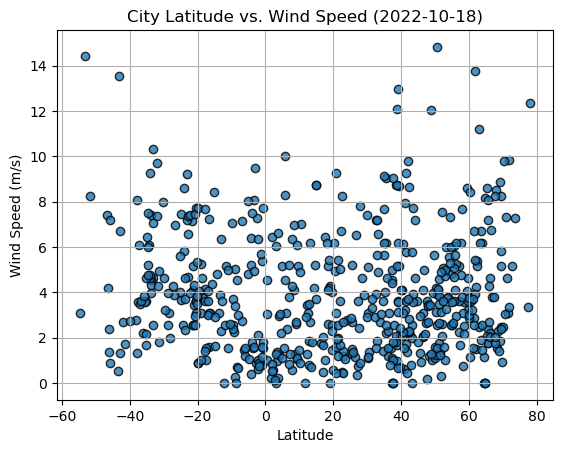

In [11]:
# Build the scatter plots for latitude vs. wind speed
# YOUR CODE HERE

# Incorporate the other graph properties
# YOUR CODE HERE

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots
# YOUR CODE HERE

In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
# YOUR CODE HERE

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,faya,18.3851,42.4509,22.06,35,21,2.60,SA,1666108228
1,farsund,58.0948,6.8047,13.30,100,0,7.65,NO,1666108228
3,jamestown,42.0970,-79.2353,5.77,77,100,9.77,US,1666107934
4,lanzhou,36.0564,103.7922,14.53,48,59,1.20,CN,1666108230
6,albany,42.6001,-73.9662,10.36,74,29,2.10,US,1666108231


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
# YOUR CODE HERE

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,new norfolk,-42.7826,147.0587,11.72,58,12,1.34,AU,1666108230
5,ushuaia,-54.8000,-68.3000,8.81,81,75,3.09,AR,1666108231
7,carnarvon,-24.8667,113.6333,20.02,76,0,7.46,AU,1666108232
9,saint-pierre,-21.3393,55.4781,22.82,68,0,5.14,RE,1666108236
10,colorado,-22.8375,-51.9731,20.36,86,96,4.69,BR,1666107965


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: 0.7161472181434118


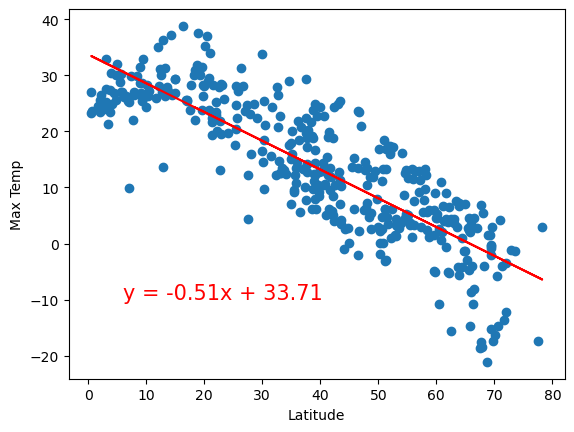

In [15]:
# Linear regression on Northern Hemisphere
# YOUR CODE HERE

The r-value is: 0.4121057168607245


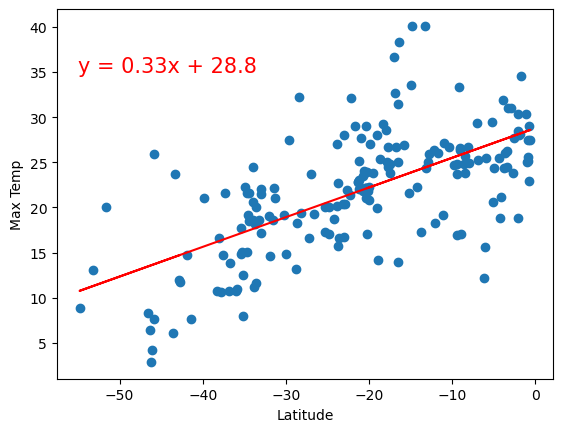

In [16]:
# Linear regression on Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.05689741545789598


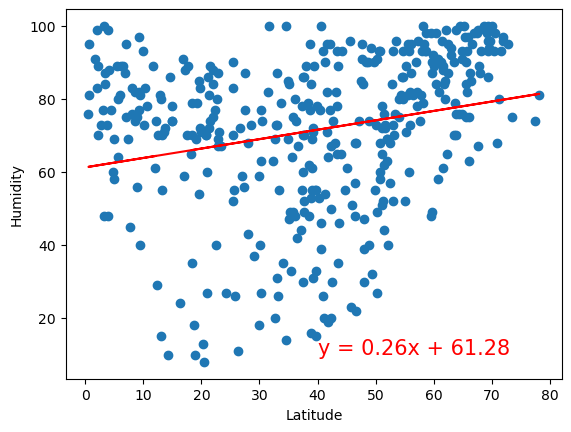

In [17]:
# Northern Hemisphere
# YOUR CODE HERE

The r-value is: 0.0002808747046324607


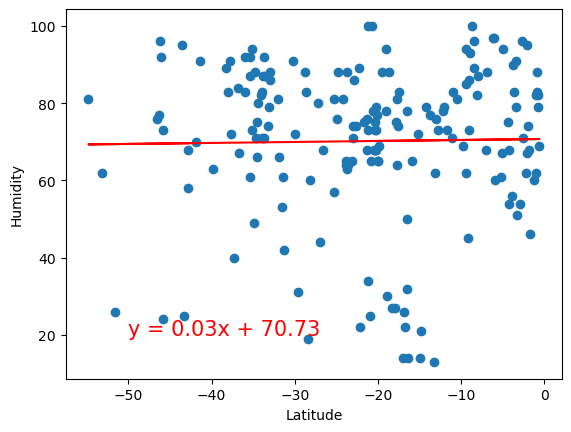

In [18]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.024026517125811015


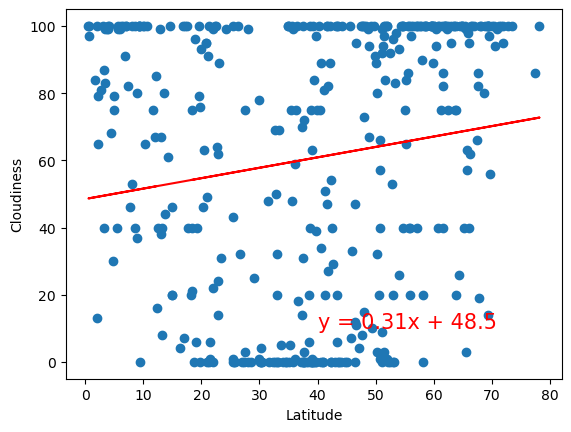

In [19]:
# Northern Hemisphere
# YOUR CODE HERE

The r-value is: 0.02056735429994368


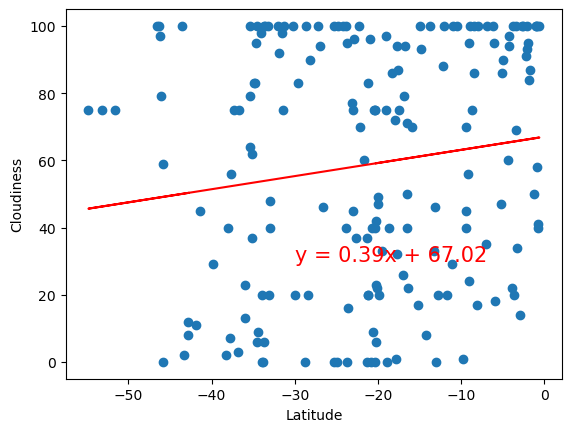

In [20]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.030396762354449467


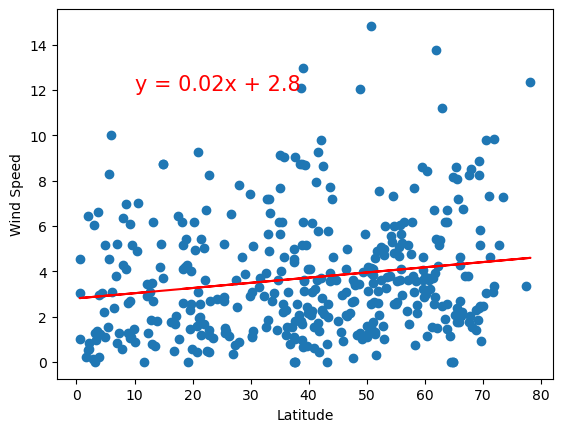

In [21]:
# Northern Hemisphere
# YOUR CODE HERE

The r-value is: 0.062239040700515696


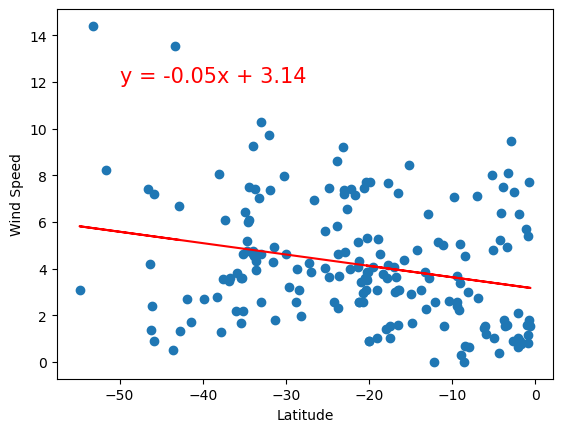

In [22]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE